<a href="https://colab.research.google.com/github/dogscanttalk/projects/blob/main/FinalProject_Stepanova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание выживаемости пациента при раке молочной железы с помощью алгоритмов машинного обучения

# Описание набора данных
 Набор данных содержит информацию о 4024 пациентах с раком молочной железы, включающую 16 признаков, характеризующих клинические параметры, и информацию жив ли пациент или нет. Набор данных получен из общедоступной базы данных Kaggle.
**Цель** - построить модель машинного обучения, которая предсказывает выживаемость пациентки (Alive/Dead)
**Задача** - Классификация-предсказание, выживет пациент или нет

Набор данных состоит из 16 столбцов:
* Age: Возраст пациентки на момент диагностики рака молочной железы
* Race: Раса пациентки
* Marital Status:Семейное положение пациентки
* T Stage:  Стадия опухоли (T), которая определяет размер и распространение опухоли.
  * T1: Опухоль менее 2 см в диаметре.
  * T2: Опухоль от 2 до 5 см в диаметре.
  * T3: Опухоль более 5 см в диаметре или опухоль, распространившаяся на близлежащие ткани.
  * T4: Опухоль, распространившаяся на отдаленные органы или ткани.
* N Stage: Стадия поражения регионарных лимфатических узлов (N).
  * N0: Лимфатические узлы не поражены.
  * N1: Поражение одного-трех лимфатических узлов в подмышечной впадине.
  * N2: Поражение более трех лимфатических узлов в подмышечной впадине или поражение лимфатических узлов в других областях.
  * N3: Поражение нескольких групп лимфатических узлов, включая надключичные лимфатические узлы.
* 6th Stage: Стадия опухоли по системе TNM (T - размер опухоли, N - поражение регионарных лимфатических узлов, M - метастазы), которая объединяет информацию о T Stage и N Stage
* differentiate: Степень дифференцировки опухоли, определяющая насколько клетки опухоли похожи на нормальные клетки
* Grade:Гистологическая степень злокачественности опухоли.
  * Обычно оценивается от I до III, где I - низкая степень злокачественности, III - высокая степень злокачественности.
* A Stage: Клиническая стадия опухоли, которая определяется на основании результатов клинического обследования.
* Tumor Size: Размер опухоли в сантиметрах.
* Estrogen Status: Статус рецепторов эстрогена в опухоли (ER).
  * ER-положительный: Опухоль содержит рецепторы эстрогена, которые могут быть мишенью для гормональной терапии.
  * ER-отрицательный: Опухоль не содержит рецепторы эстрогена.
* Progesterone Status: Статус рецепторов прогестерона в опухоли (PR).
  * PR-положительный: Опухоль содержит рецепторы прогестерона.
  * PR-отрицательный: Опухоль не содержит рецепторы прогестерона.
* Regional Node Examined: Количество лимфатических узлов, которые были исследованы во время операции.
* Reginol Node Positive: Количество пораженных регионарных лимфатических узлов.
* Survival Months: Продолжительность жизни пациентки в месяцах с момента диагностики.
* Status: Статус выживаемости





# Загрузка и предварительная обработка данных
Импортируем библиотеки

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
! pip install -q kaggle
from google.colab import files

files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"tatianastepanova","key":"b288347803c886e64042d0dfcf9e99a2"}'}

In [8]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d reihanenamdari/breast-cancer
!unzip breast-cancer.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/reihanenamdari/breast-cancer
License(s): Attribution 4.0 International (CC BY 4.0)
breast-cancer.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  breast-cancer.zip
replace Breast_Cancer.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
import pandas as pd

df = pd.read_csv('Breast_Cancer.csv')
df.head(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


# Анализ данных

In [10]:
column_names = df.columns.tolist()
column_names

['Age',
 'Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status']

In [11]:
df.shape

(4024, 16)

In [12]:
df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [13]:
df.rename(columns={"Reginol Node Positive":"Regional Node Positive"}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Regional Node Positive  4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [15]:
df.describe()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


Проверка данных на наличие пропущенных значений, дупликатов

In [16]:
df.isna().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0


In [17]:
df.duplicated().sum()

1

Набор данных не содержит пропущенных значений, содержит один дупликат

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [19]:
df.mean(numeric_only=True)

,0
Age,53.969923
Tumor Size,30.477007
Regional Node Examined,14.358439
Regional Node Positive,4.158837
Survival Months,71.301765


Проверяем корреляцию между нашими переменнымы. Мы видим, что у нас нет сильной корреляции между переменными

In [20]:
cat = df.select_dtypes(include='object')
non_cat = df.select_dtypes(exclude='object')

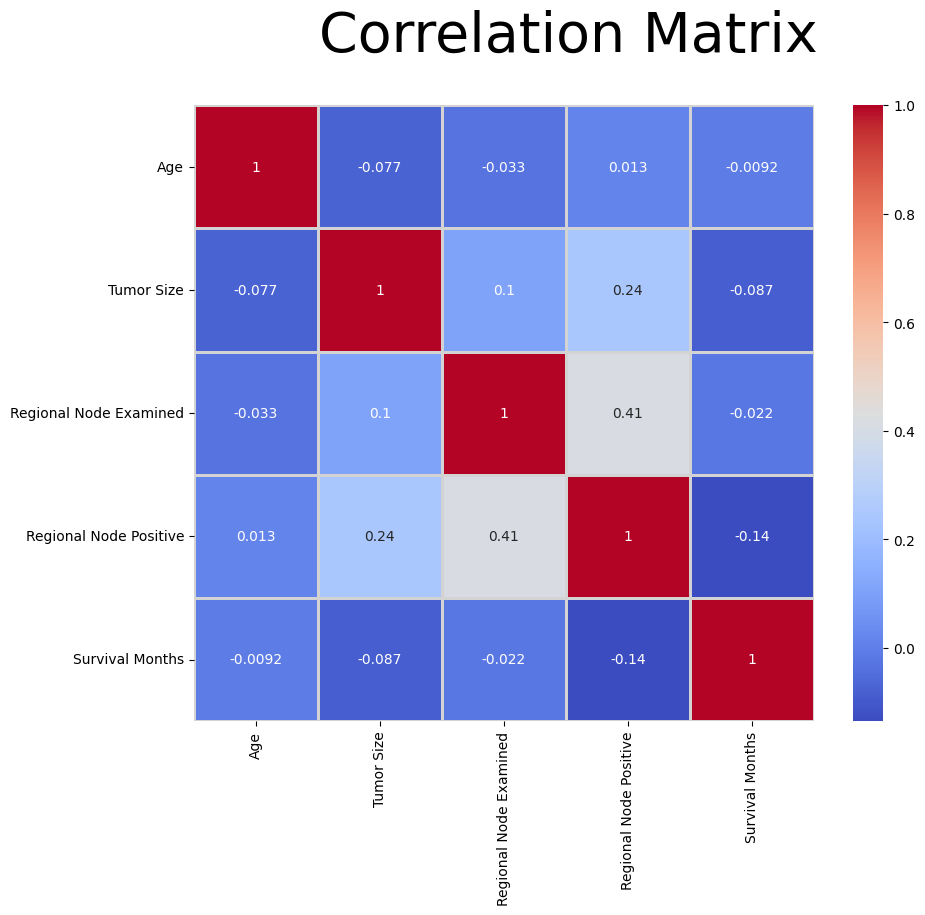

In [21]:
plt.figure(figsize=(10, 8))

sns.heatmap(non_cat.corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

Ключевая проблема, стоящая перед выявлением, заключается в том, как классифицировать опухоли на злокачественные (раковые) и доброкачественные (нераковые).
Наша цель при использовании этого набора данных - выяснить, жив пациент или мертв, в последнем столбце - статус.

In [22]:
df['Status'].value_counts()

,count
Status,
Alive,3407
Dead,616


<ipython-input-23-ad197ff59f18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Status', data=df, palette='pastel')


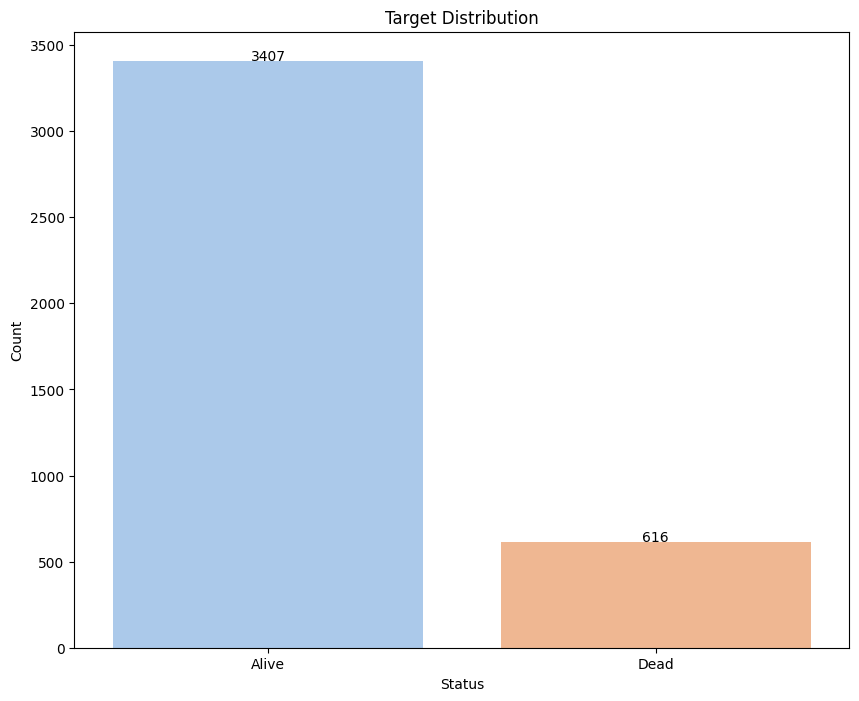

In [23]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Status', data=df, palette='pastel')

# Add labels to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha="center")

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Target Distribution')
plt.show()

В подавляющем большинстве случаев пациентки выжили, лишь около 15% данных относятся к женщинам, которые скончались.

Посчитаем количество уникальных значений для каждого столбца

In [24]:
for col in df.columns:
    print(f'{col} has {df[col].nunique()} values')

Age has 40 values
Race has 3 values
Marital Status has 5 values
T Stage  has 4 values
N Stage has 3 values
6th Stage has 5 values
differentiate has 4 values
Grade has 4 values
A Stage has 2 values
Tumor Size has 110 values
Estrogen Status has 2 values
Progesterone Status has 2 values
Regional Node Examined has 54 values
Regional Node Positive has 38 values
Survival Months has 107 values
Status has 2 values


In [25]:
cat = df.select_dtypes(include='object')
non_cat = df.select_dtypes(exclude='object')

Посмотрим на распределение категориальных признаков

<ipython-input-26-c9fa57f2e61b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='pastel')
<ipython-input-26-c9fa57f2e61b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='pastel')
<ipython-input-26-c9fa57f2e61b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='pastel')
<ipython-input-26-c9fa57f2e61b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

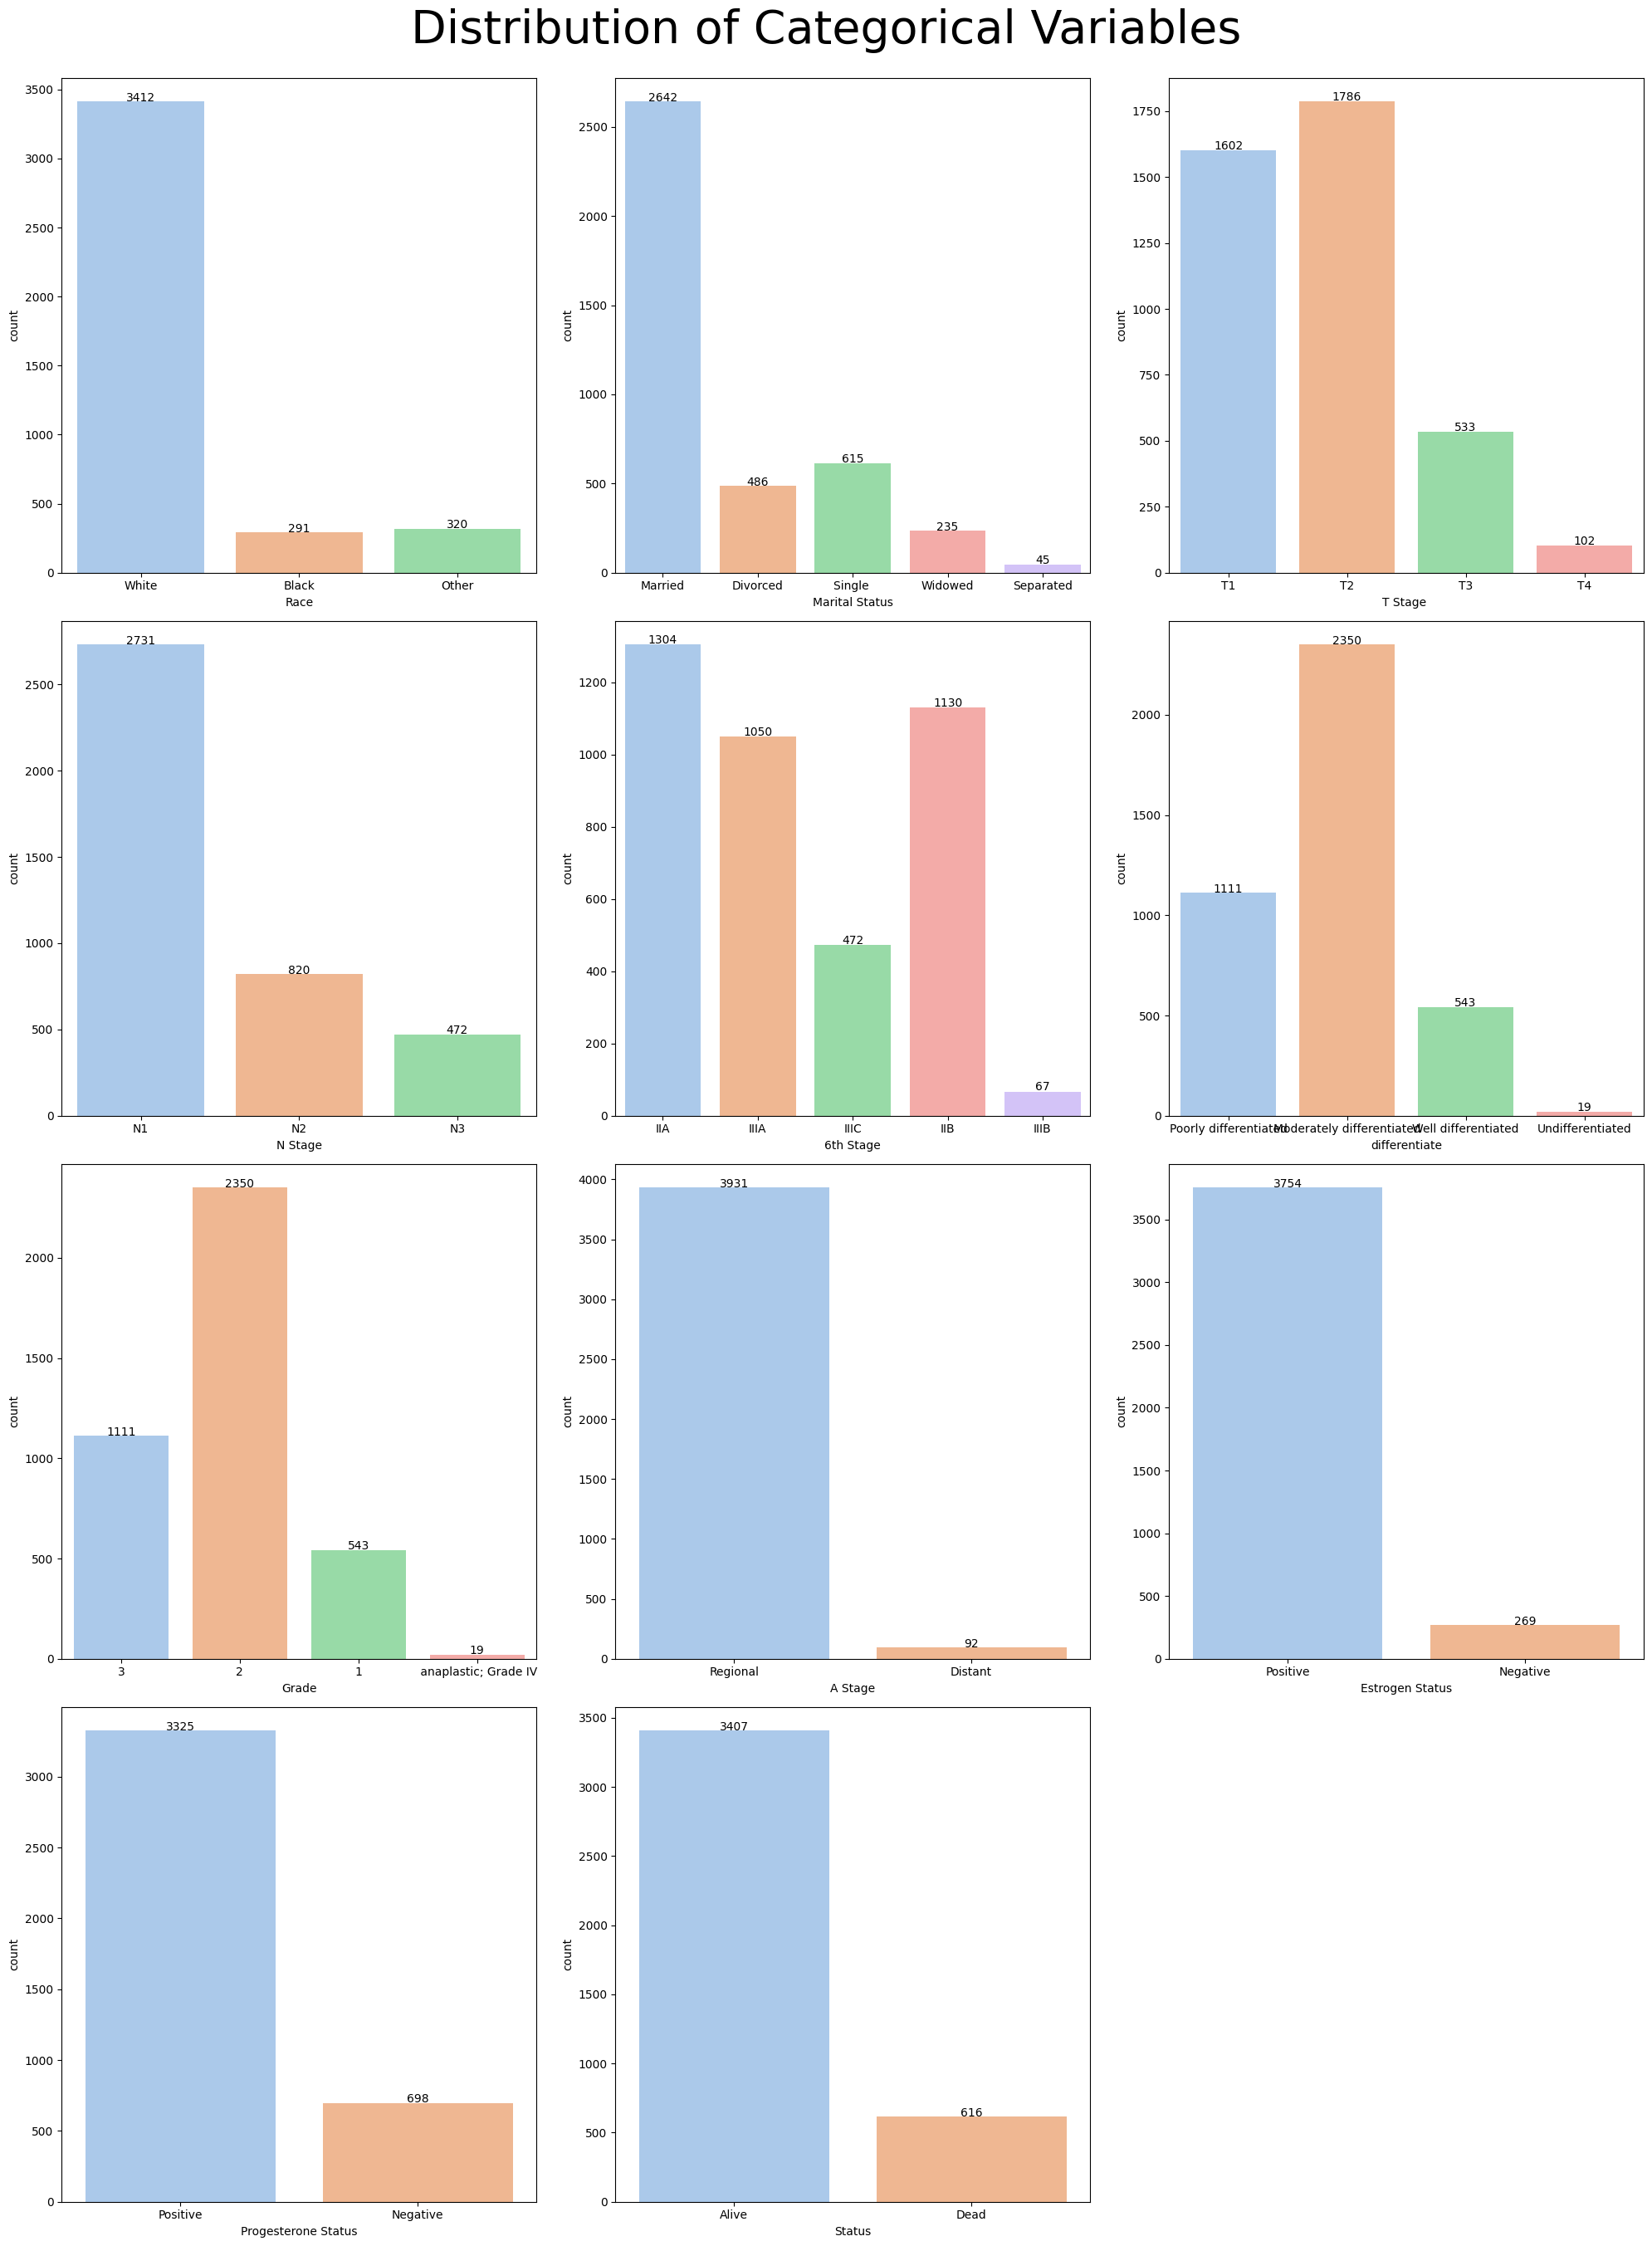

In [26]:
plt.figure(figsize=(20, 27))
plotnumber = 1

for column in cat:
    if plotnumber <= len(cat):
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x=df[column], palette='pastel')

        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{int(p.get_height())}', ha="center")

        plt.xlabel(column)
        # plt.xticks(rotation=45)
        plt.xlabel(column)

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()


Большинство женщин в наборе данных - белые. Преобладающее семейное положение - замужем.

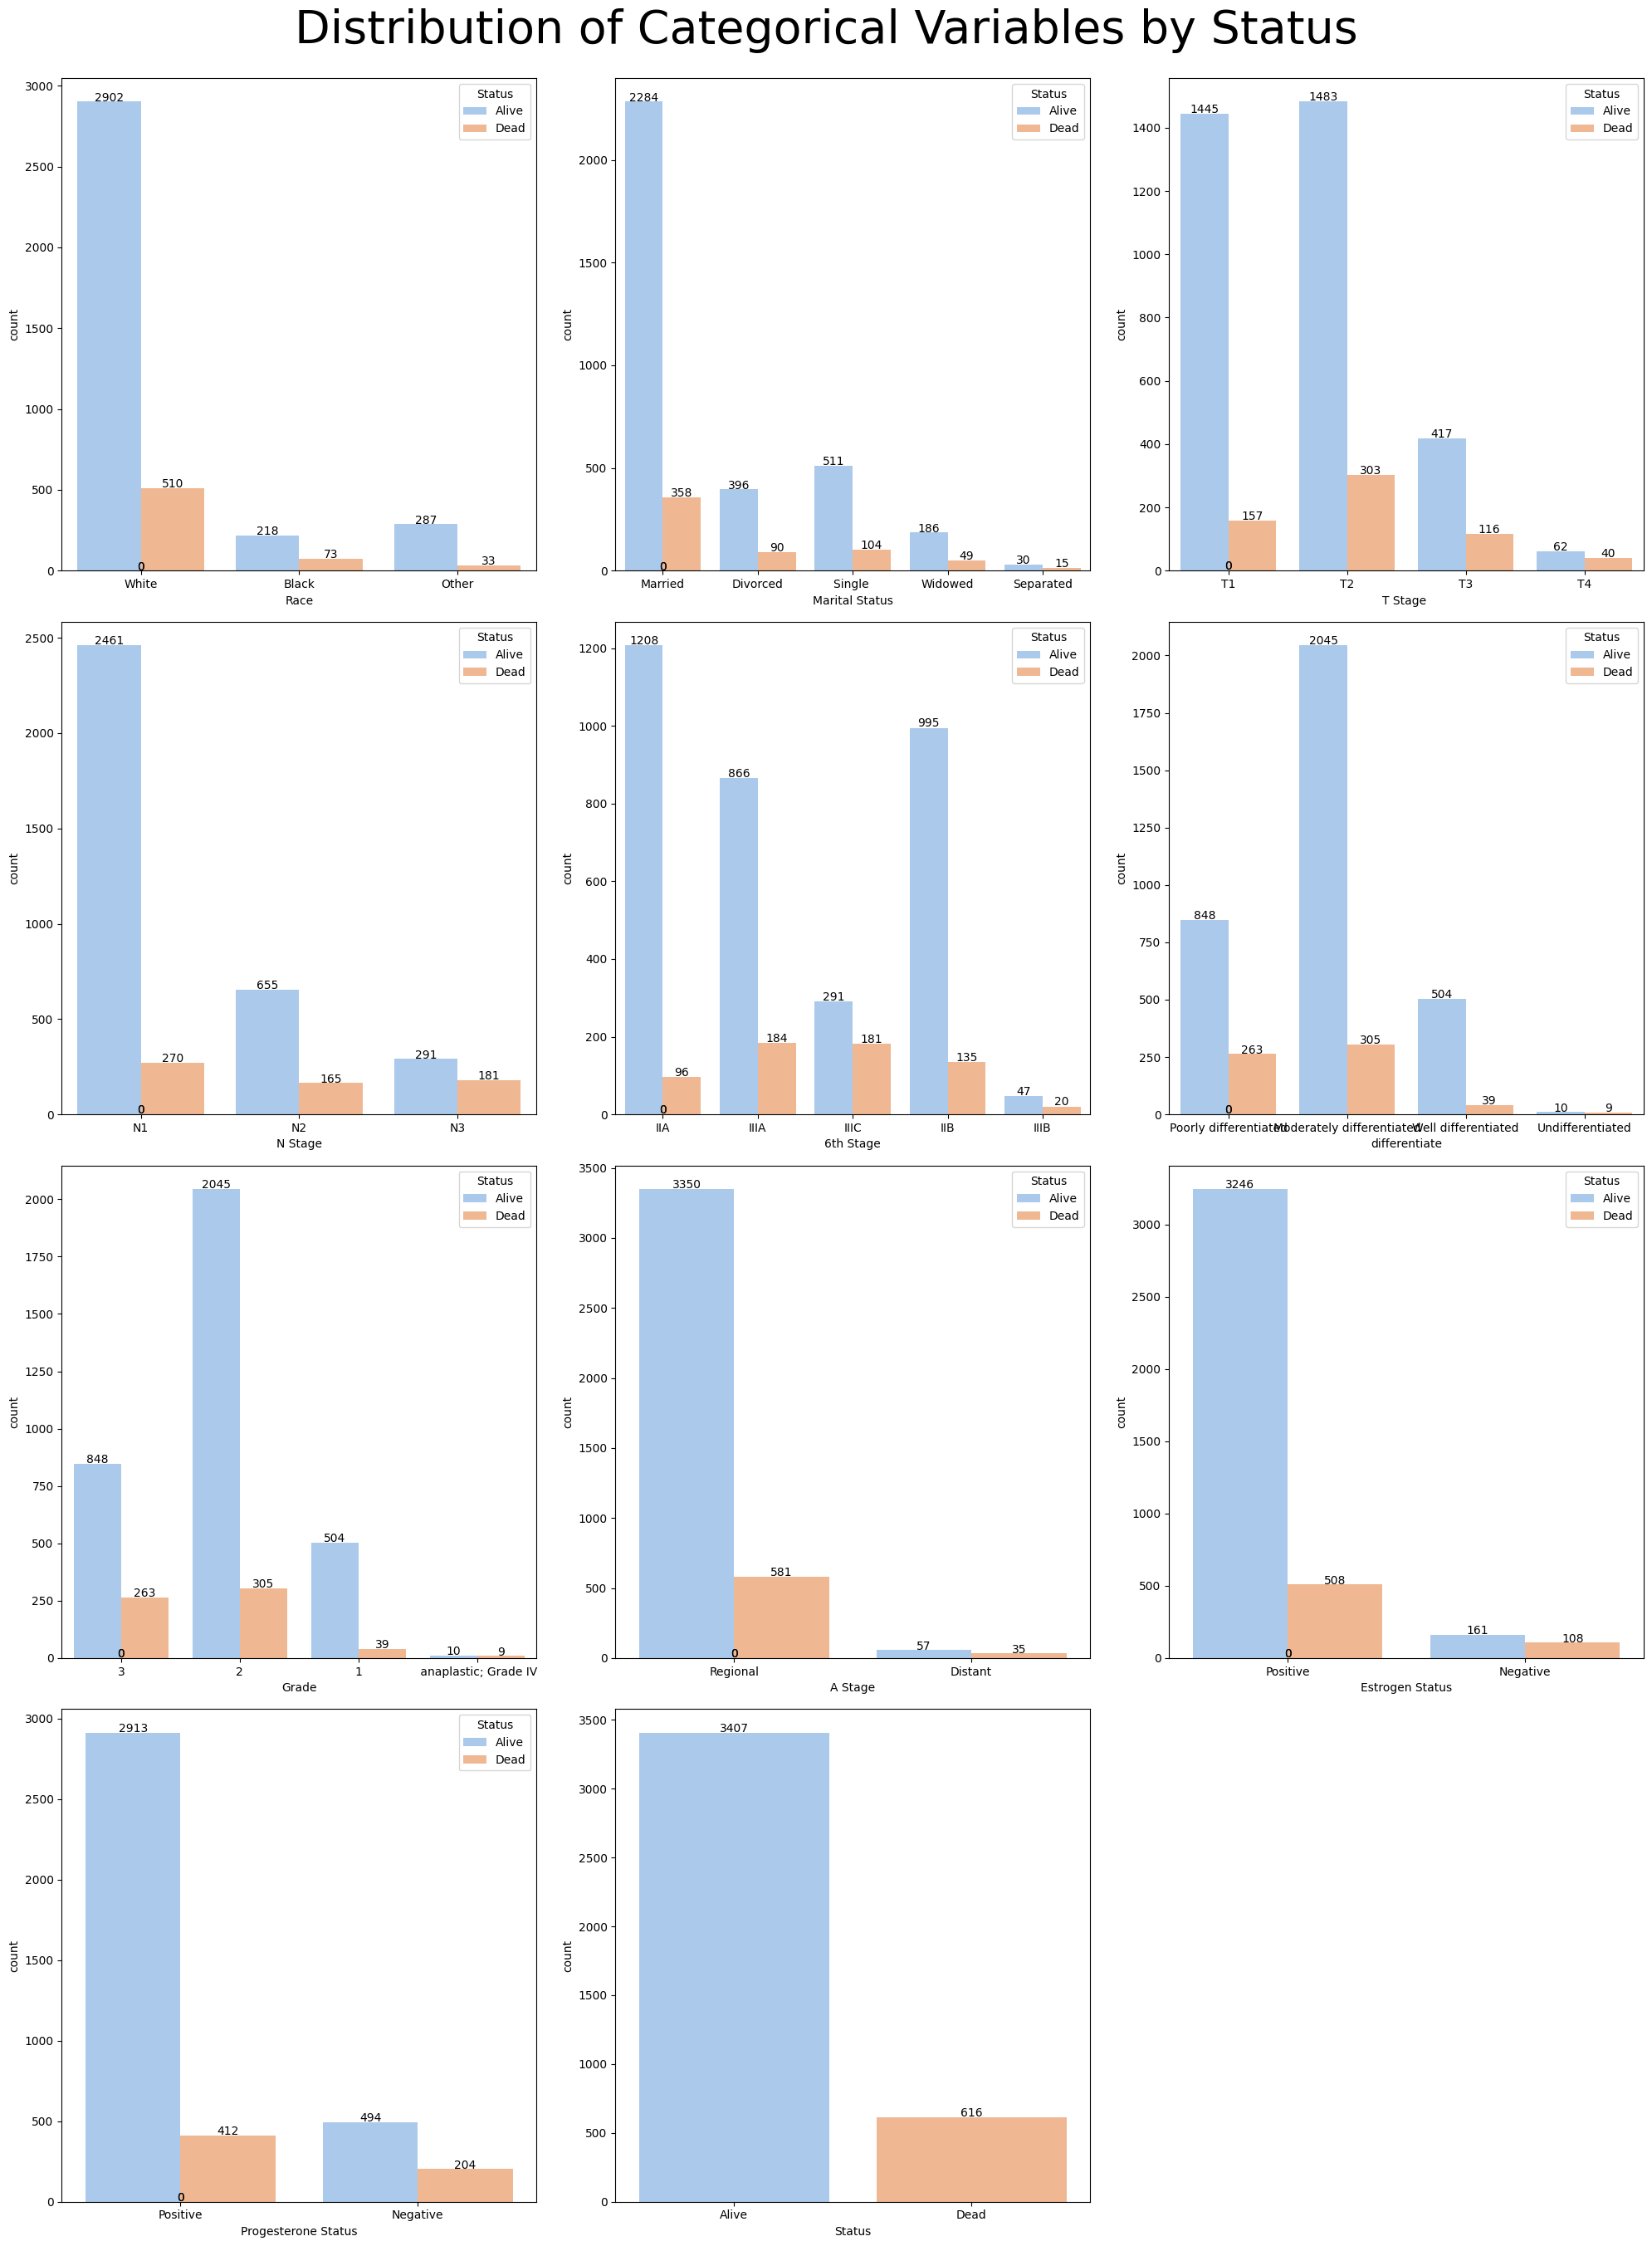

In [27]:
plt.figure(figsize=(20, 27))
plotnumber = 1

# Loop through each column in the dataframe
for col in cat:
    if plotnumber <= len(cat):
        plt.subplot(4, 3, plotnumber)
        ax = sns.countplot(x=df[col], hue=df['Status'], palette='pastel')

        # Add labels to each bar in the plot
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha="center")

    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables by Status', fontsize=40, y=1)
plt.tight_layout()
plt.show()

Посмотрим на распределение числовых  признаков

<ipython-input-28-719f6e27d338>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, palette='pastel')
<ipython-input-28-719f6e27d338>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, palette='pastel')
<ipython-input-28-719f6e27d338>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, palette='pastel')
<ipython-input-28-719f6e27d338>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, palette='pastel')
<ipython-input-28-719f6e27d338>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[column], kde=True, palette='pastel')


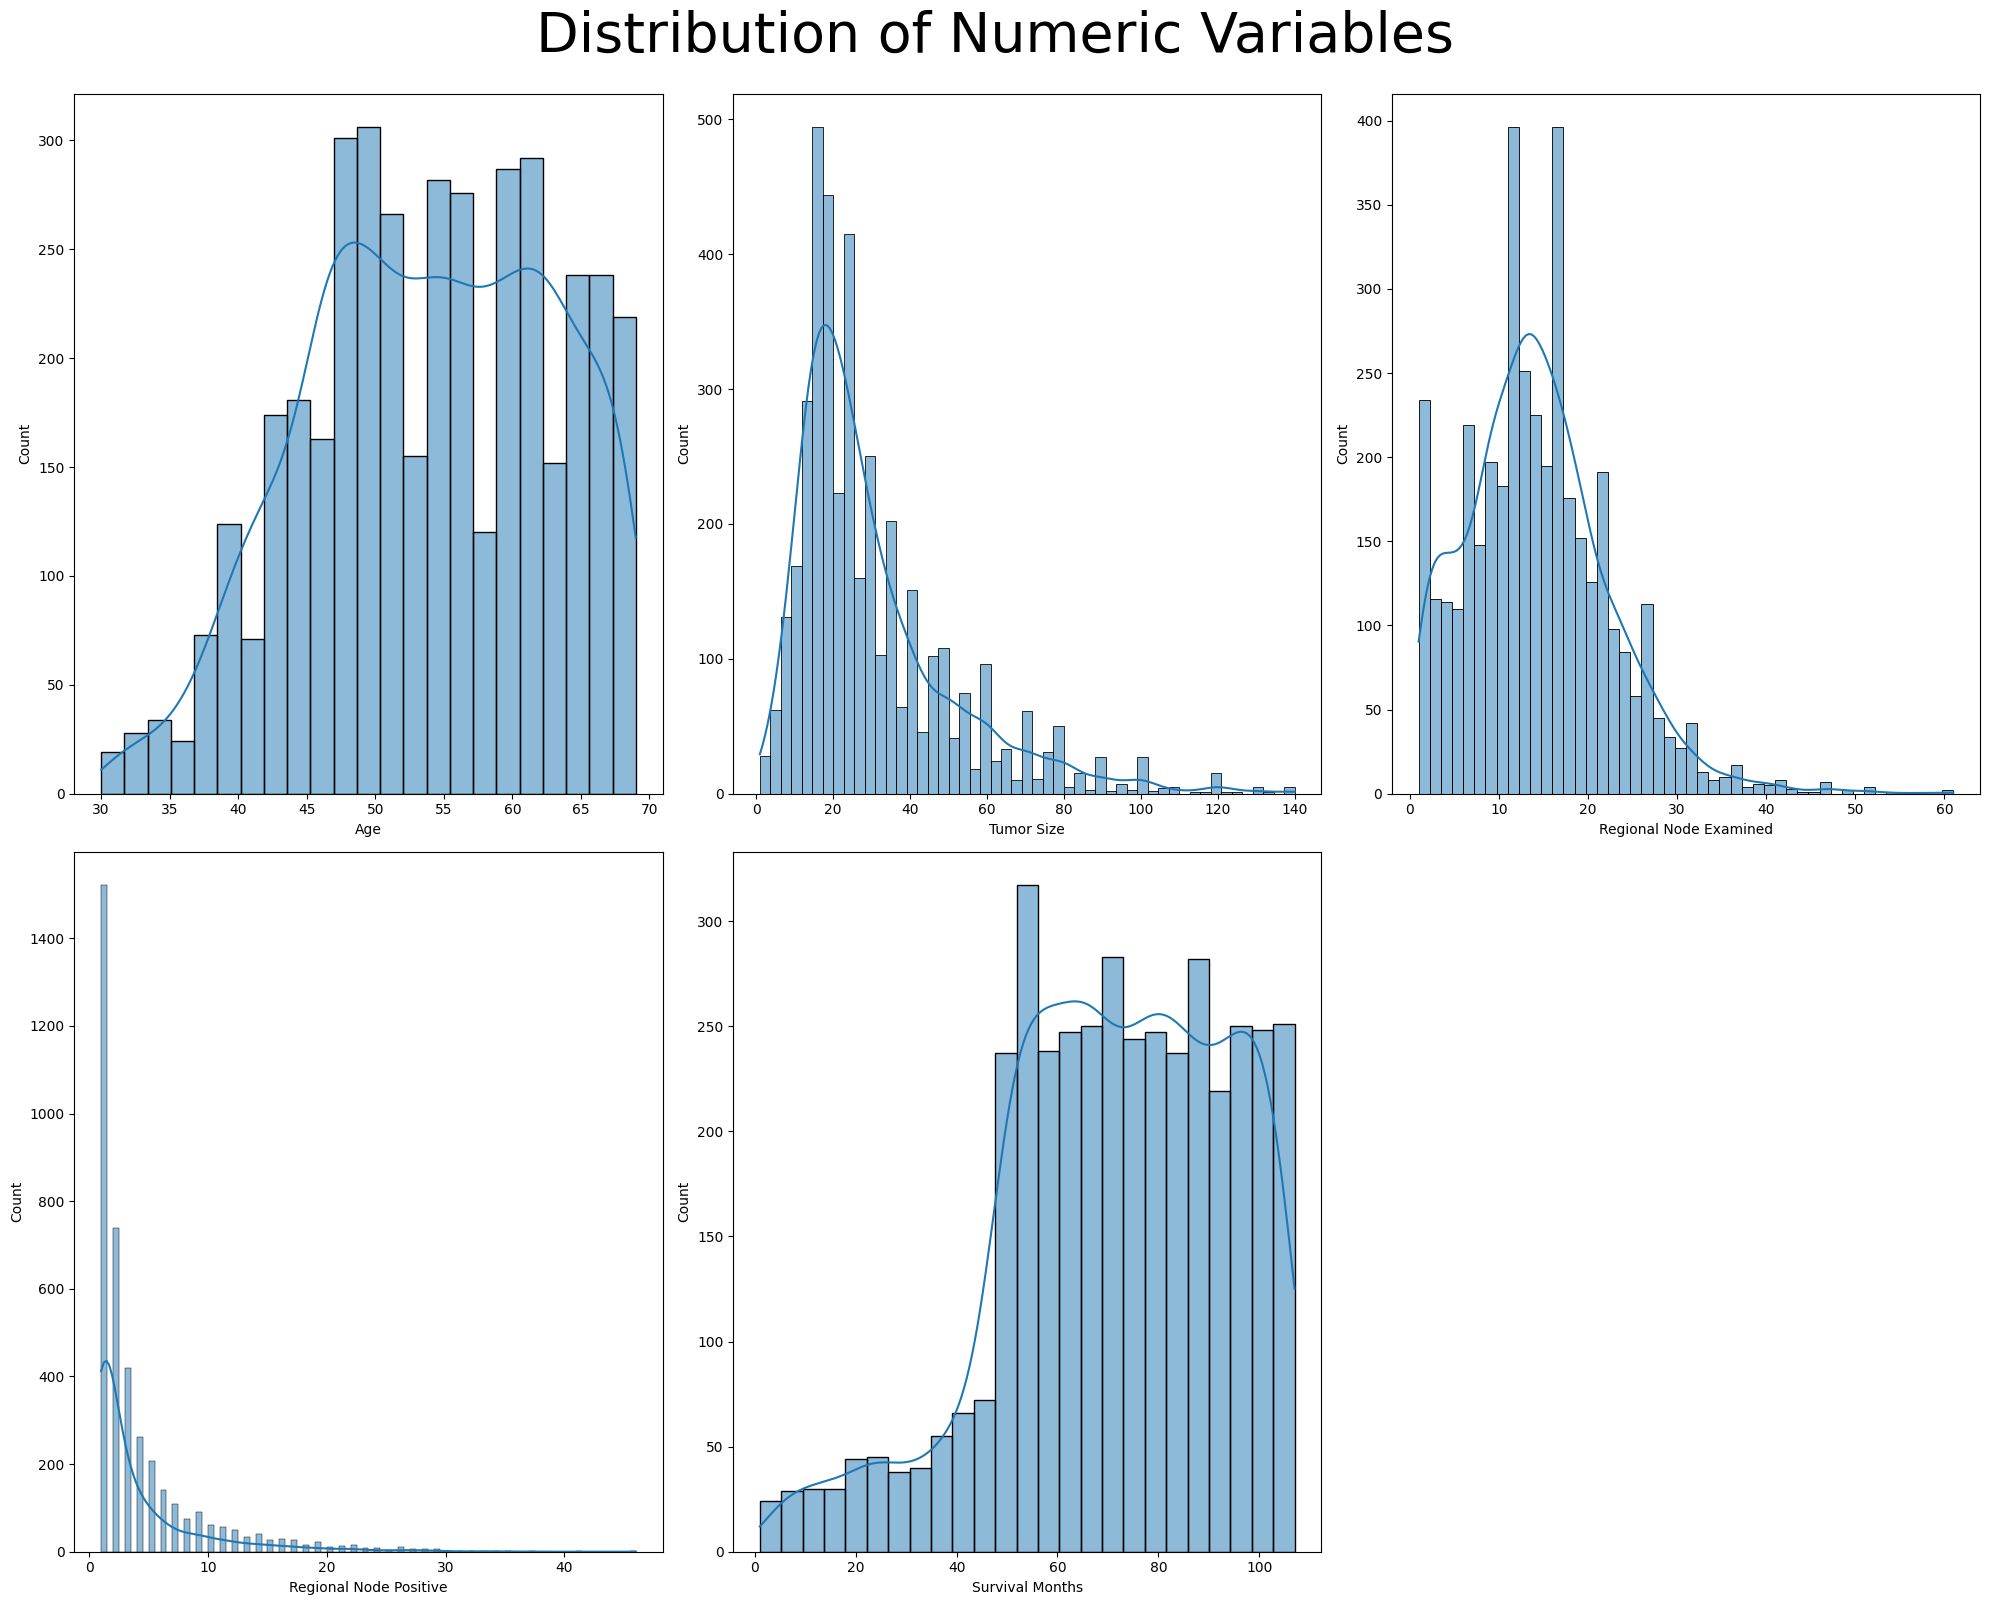

In [28]:
plt.figure(figsize=(20, 16))
plotnumber = 1

for column in non_cat:
    if plotnumber <= len(non_cat):
        ax = plt.subplot(2, 3, plotnumber)
        sns.histplot(df[column], kde=True, palette='pastel')
        plt.xlabel(column)

    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

Размер опухоли (Tumor Size), количество региональных лимфоузлов, подвергнутых исследованию (Regional Node Examined) и количество положительных региональных лимфоузлов (Regional Node Positive) имеют правостороннее смещение.
- Возраст (Age) и продолжительность выживания в месяцах (Survival Months) имеют левостороннее смещение, хотя и менее выраженное.

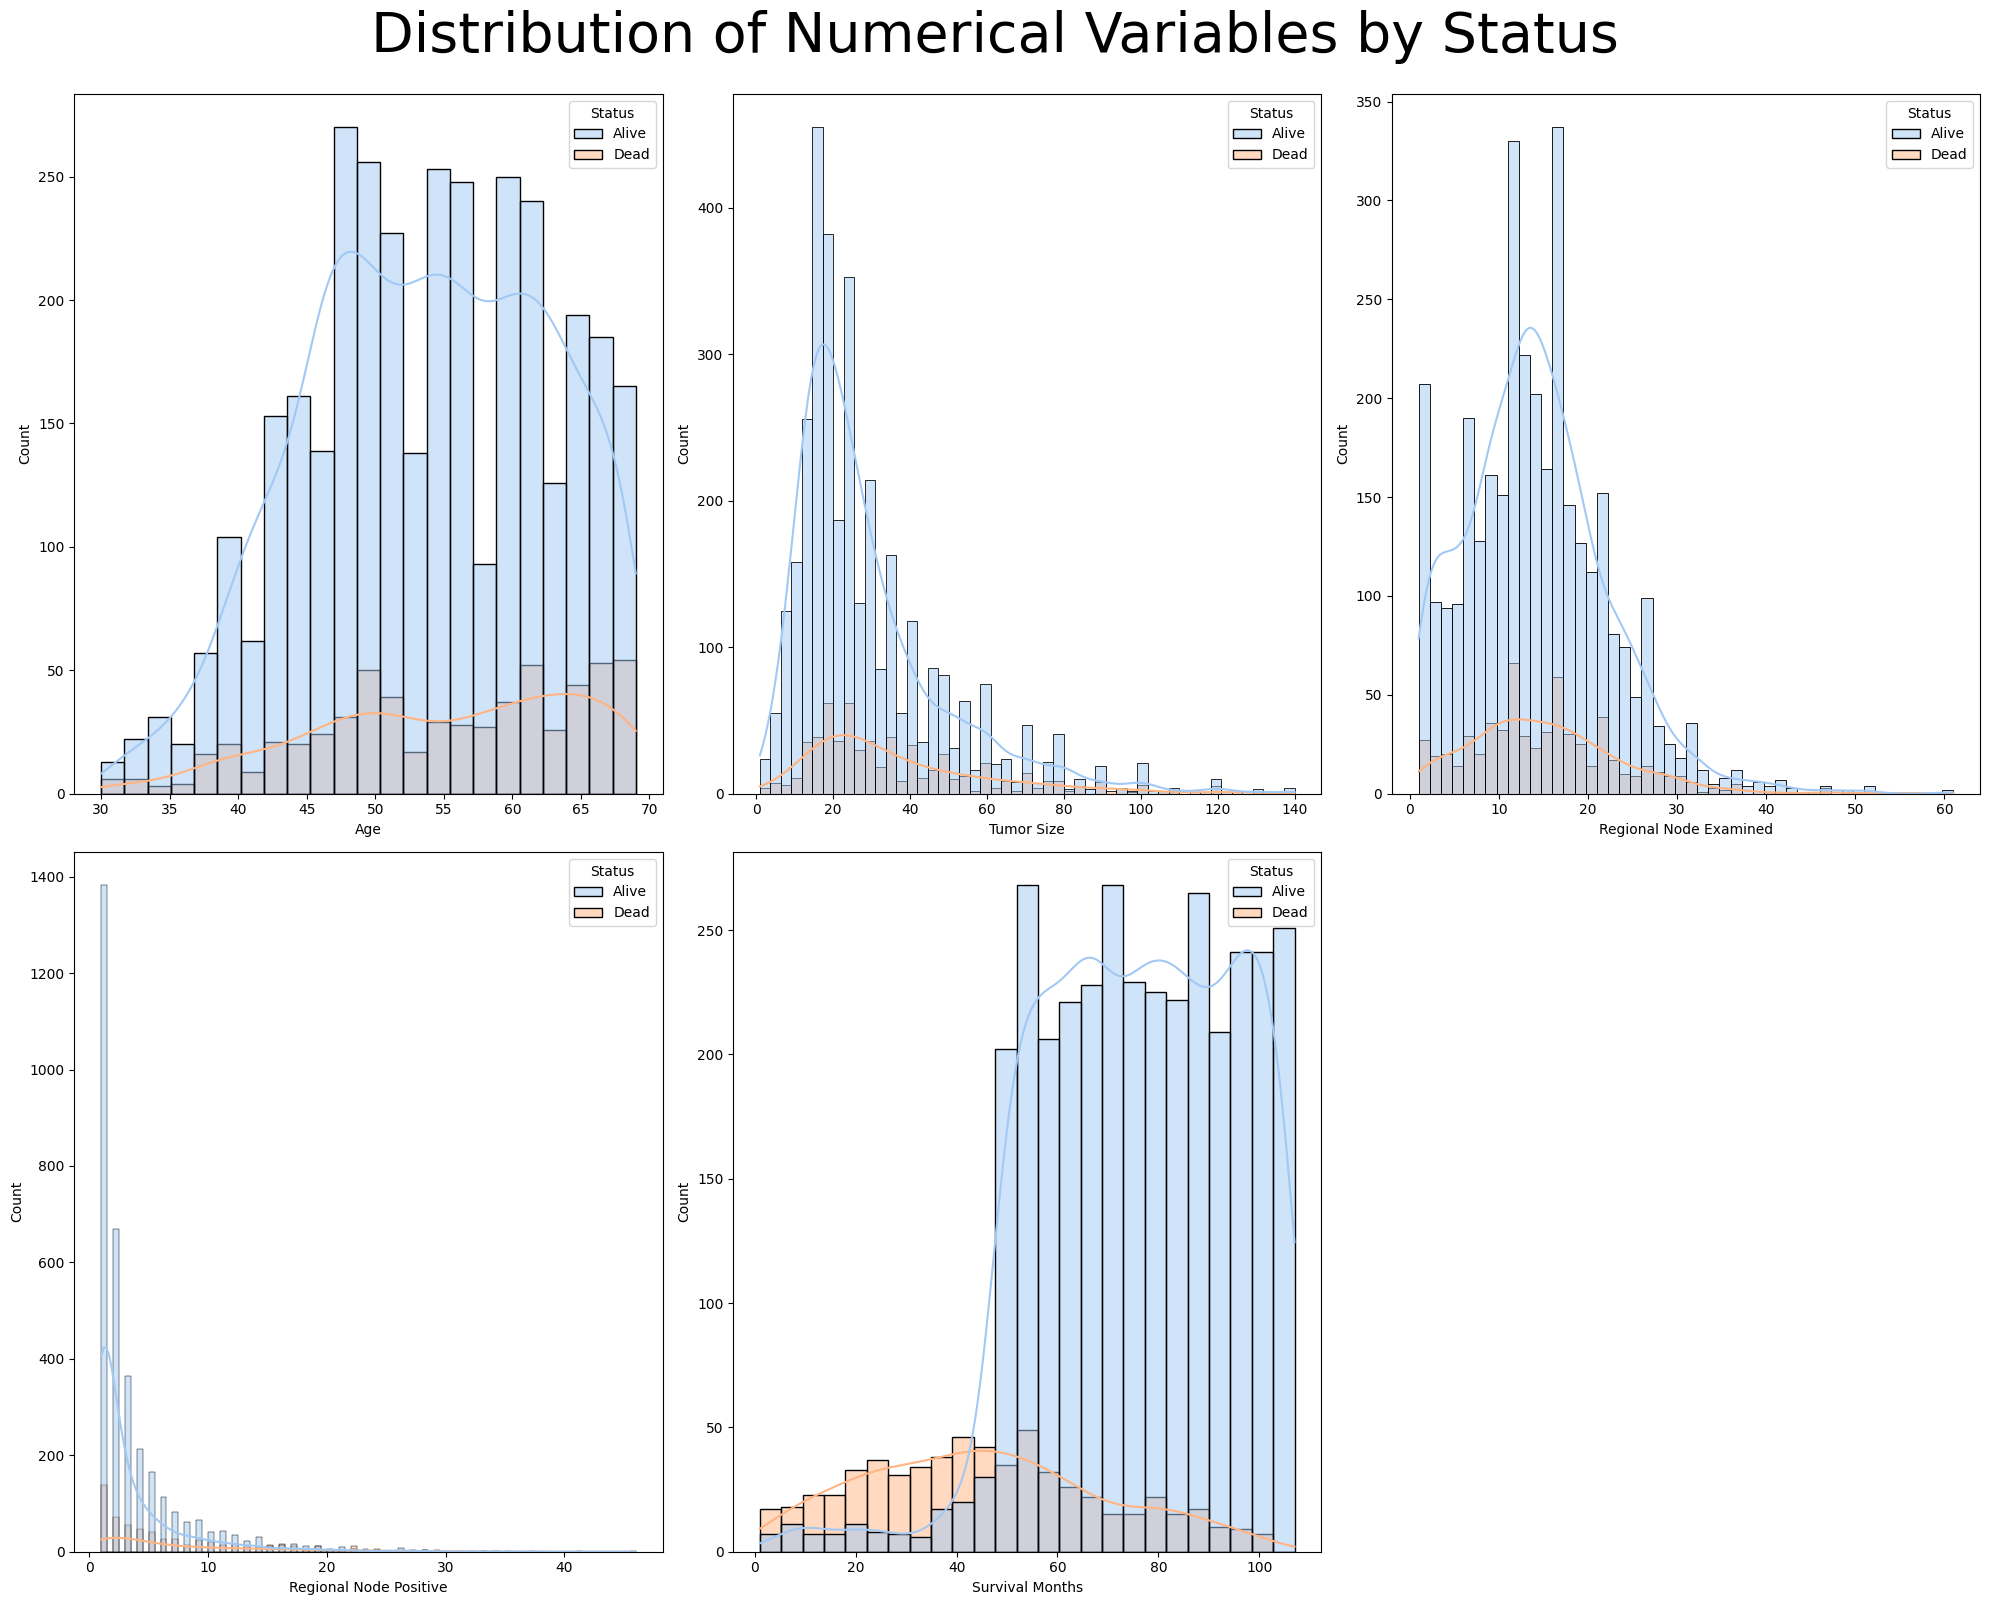

In [29]:
plt.figure(figsize=(20, 16))
plotnumber = 1

# Loop through each column in the dataframe
for col in non_cat:
    plt.subplot(2, 3, plotnumber)
    sns.histplot(data=df, x=col, hue='Status', kde=True, palette='pastel')
    plt.xlabel(col)
    plotnumber += 1

# Set the main title and adjust layout
plt.suptitle('Distribution of Numerical Variables by Status', fontsize=40, y=1)
plt.tight_layout()
plt.show()

Продолжительность выживания в месяцах  резко отличается между выжившими и умершими женщинами.

Задание переменных

In [30]:
X = df.drop('Status', axis=1)
y = df['Status']

#Предварительная обработка данных

Преобразование категориальных признаков в числовые

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(0,cat.shape[1]):
    cat.iloc[:,i]=le.fit_transform(cat.iloc[:,i])

In [32]:
df_num = pd.concat([non_cat, cat], axis=1)

In [33]:
X = df_num.drop('Status', axis=1)

In [48]:
y = df['Status']

,Status
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


Балансировка классов

In [50]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

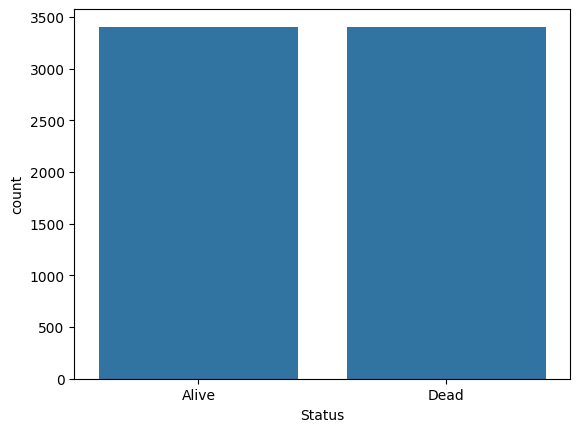

In [51]:
ax = sns.countplot(x=y)

# Постановка задачи и построение модели
Наша задача - Разработать модель машинного обучения, которая прогнозирует вероятность выживаемости пациентов с раком молочной железы на основе их характеристик.

Разделить датасет на обучающую и тестовую выборки

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Масштабирование данных

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели
В этом проекте мы применили пять алгоритмов машинного обучения: метод опорных векторов  (SVM), случайный лес (Random Forest), логистическая регрессия (Logistic Regression), дерево решений (Decition Tree) и наивный байесовский классификатор (Naive Bayes) к набору диагностических данных рака молочной железы.  

In [55]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
models = {
  'SVM': SVC(kernel='linear', random_state=42),
  'Random Forest': RandomForestClassifier(random_state=42),
  'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
  'Decision Tree': DecisionTreeClassifier(random_state=42),
  'Naive Bayes': GaussianNB()
}

In [56]:
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)

Подбор гиперпараметров

In [62]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, make_scorer
param_grids = {
  'SVM': {'C': [0.1, 1, 10]},
  'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
  'Logistic Regression': {'C': [0.1, 1, 10]},
  'Decision Tree': {'max_depth': [None, 10, 20]},
  'Naive Bayes': {}
}

best_models = {}
for name, model in models.items():
  grid_search = GridSearchCV(model, param_grids[name], scoring=make_scorer(accuracy_score), cv=KFold(n_splits=5, shuffle=True, random_state=42), n_jobs=-1)
  grid_search.fit(X_train, y_train)
  best_models[name] = {
    'best_estimator': grid_search.best_estimator_,
    'best_params': grid_search.best_params_,
    'best_score': grid_search.best_score_
  }
  y_pred = grid_search.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_pred)
  best_models[name]['test_accuracy'] = test_accuracy

# Оценка модели и результатов

In [63]:
for name, results in best_models.items():
  print(f"Модель: {name}")
  print(f"Лучшие параметры: {results['best_params']}")
  print(f"Лучший score (cross-validation): {results['best_score']}")
  print(f"Точность на тестовой выборке: {results['test_accuracy']}")
  print("-" * 20)

Модель: SVM
Лучшие параметры: {'C': 1}
Лучший score (cross-validation): 0.7904952110259924
Точность на тестовой выборке: 0.7791636096845195
--------------------
Модель: Random Forest
Лучшие параметры: {'max_depth': None, 'n_estimators': 100}
Лучший score (cross-validation): 0.9598244183015332
Точность на тестовой выборке: 0.9809244314013206
--------------------
Модель: Logistic Regression
Лучшие параметры: {'C': 10}
Лучший score (cross-validation): 0.7886601804589678
Точность на тестовой выборке: 0.7776962582538518
--------------------
Модель: Decision Tree
Лучшие параметры: {'max_depth': None}
Лучший score (cross-validation): 0.9291881028262935
Точность на тестовой выборке: 0.9449743213499633
--------------------
Модель: Naive Bayes
Лучшие параметры: {}
Лучший score (cross-validation): 0.7167478703991793
Точность на тестовой выборке: 0.7094644167278064
--------------------


# Выводы


В данной работе на наборе данных Breast Cancer было применено пять основных алгоритмов машинного обучения: SVM, Random Forest, Logistic Regression, Decision Tree и Naive Bayes. Целью исследования было сравнение эффективности этих алгоритмов в задаче классификации рака молочной железы. На основе предоставленных результатов, было показано, что Random Forest и Decision Tree продемонстрировали наилучшие результаты. Обе модели достигли высокой точности как на этапе перекрестной проверки cross-validation, так и на независимом тестовом наборе данных. Random Forest показал  лучшие результаты, достигнув точности около 98% на тестовом наборе данных, в то время как Decision Tree показал около 94%.

Модели SVM и Logistic Regression показали схожую и заметно меньшую точность, около 78%. Naive Bayes оказался наименее эффективной моделью с точностью около 71%.
